# 1 Feature engineering

## 1.1 Import the data and create the anchor date columns

In [1]:
# import packages needed
import pandas as pd
import numpy as np

### 1.1.1

In [2]:
# import data
txn = pd.read_csv("Retail_Data_Transactions.csv")
# identify the number of rows in the dataset
txn.shape[0]

125000

### 1.1.2

In [3]:
# convert the trans_date column to type datetime and store in new column txn_date
txn["txn_date"] = pd.to_datetime(txn["trans_date"])
# drop trans_date column
txn = txn.drop(columns = ["trans_date"])
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


### 1.1.3

In [4]:
# identify the min value in txn_date column
txn["txn_date"].max()

Timestamp('2015-03-16 00:00:00')

In [5]:
# identify the max value in txn_date column
txn["txn_date"].min()

Timestamp('2011-05-16 00:00:00')

### 1.1.4

In [6]:
# import offsets pandas package
from pandas.tseries.offsets import MonthEnd
# create new column ME_DT with the last date of the month
txn["ME_DT"] = txn['txn_date'] + MonthEnd(0)
txn

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


### 1.1.5

In [7]:
# create the YEAR column with the datetime from column txn_date
txn["YEAR"] = txn['txn_date'].dt.year
# match table output from assignment file
txn.iloc[55:60]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


## 1.2 Create features that capture annual spending

### 1.2.1

In [8]:
# create new table by groupby and aggregations the previous dataframe 
clnt_annual_aggregations = txn.groupby(["customer_id", "YEAR"]).agg(ann_txn_amt_sum=pd.NamedAgg(column="tran_amount", aggfunc="sum"),
                                                                    ann_txn_amt_ave=pd.NamedAgg(column="tran_amount", aggfunc="mean"),
                                                                    ann_txn_amt_std=pd.NamedAgg(column="tran_amount", aggfunc="std"),
                                                                    ann_txn_amt_var=pd.NamedAgg(column="tran_amount", aggfunc="var"),
                                                                    ann_txn_amt_sem=pd.NamedAgg(column="tran_amount", aggfunc="sem"),
                                                                    ann_txn_amt_max=pd.NamedAgg(column="tran_amount", aggfunc="max"),
                                                                    ann_txn_amt_min=pd.NamedAgg(column="tran_amount", aggfunc="min"),
                                                                    ann_txn_cnt=pd.NamedAgg(column="tran_amount", aggfunc="count"))
clnt_annual_aggregations

ann_txn_amt_sum  ...  ann_txn_cnt
customer_id YEAR                   ...             
CS1112      2011              212  ...            3
            2012              337  ...            5
            2013              212  ...            3
            2014              212  ...            3
            2015               39  ...            1
...                           ...  ...          ...
CS9000      2011               39  ...            2
            2012              216  ...            4
            2013              147  ...            2
            2014               97  ...            4
            2015               34  ...            1

[31140 rows x 8 columns]

### 1.2.2

In [9]:
# import plotting package
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Client Annual Spendings Distribution')

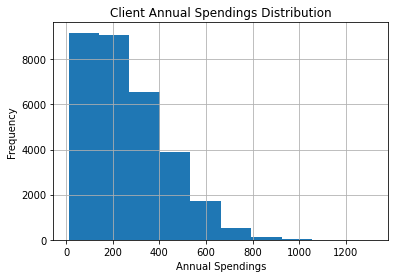

In [10]:
# plot the histogram of the sum
clnt_annual_aggregations["ann_txn_amt_sum"].hist()
plt.xlabel("Annual Spendings")
plt.ylabel("Frequency")
plt.title("Client Annual Spendings Distribution")

Text(0.5, 1.0, 'Client Annual Spendings Frequency Distribution')

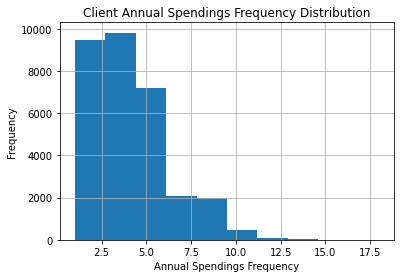

In [11]:
# plot the histogram of the count
clnt_annual_aggregations["ann_txn_cnt"].hist()
plt.xlabel("Annual Spendings Frequency")
plt.ylabel("Frequency")
plt.title("Client Annual Spendings Frequency Distribution")

### 1.2.3

In [12]:
# pivot the table and fill the missing values
clnt_annual_aggregations_pivot = pd.pivot_table( clnt_annual_aggregations.reset_index(level = "YEAR") ,index = "customer_id",
                                                columns = "YEAR", 
                                                values = ["ann_txn_amt_sum","ann_txn_amt_ave","ann_txn_amt_std","ann_txn_amt_var","ann_txn_amt_sem","ann_txn_amt_max","ann_txn_amt_min","ann_txn_cnt"],
                                                fill_value = 0)
clnt_annual_aggregations_pivot.head(5)

ann_txn_amt_ave                        ... ann_txn_cnt          
YEAR                   2011       2012       2013  ...        2013 2014 2015
customer_id                                        ...                      
CS1112            70.666667  67.400000  70.666667  ...           3    3    1
CS1113            81.333333  74.800000  85.200000  ...           5    4    3
CS1114            85.200000  75.000000  70.400000  ...           5    6    1
CS1115            87.000000  67.571429  79.571429  ...           7    4    1
CS1116            58.750000  76.666667  59.000000  ...           1    5    0

[5 rows x 40 columns]

There are 40 columns because there are 8 aggregations types for 5 year from 2011 to 2015. Therefore, the columns count is 8*5 = 40. 



NaN values are caused by clients with single transactions annually. NaN values exist in three columns standard deviation, variance and standard error of the mean; these measures can't be calculated with a single value. Fill the NaN values with zeros.
 

### 1.2.4

In [13]:
# check the pivot table multiple level of the columns
clnt_annual_aggregations_pivot.columns.nlevels

2

In [14]:
# print all columns in the pivot table
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt_std', 2011),
            ('ann_txn_amt_std', 2012),
            ('ann_txn_amt_std', 2013),
            ('ann_txn_amt_std', 2014),
            ('ann_txn_amt_std', 2015),
            ('ann_txn_amt

There are two levels referring to two types of variations the YEAR and the type of aggregation. The columns name consists tuples of all the possible combinations between these two variations; therefore, number of columns is 8 aggregation type * 5 years = 40



### 1.2.5

In [15]:
# convert the multi-index columns to a single layer
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0). astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1). astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1

In [16]:
# print the 1 layer version of the pivot table
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,39,56,52,36,59,39,12.719189,5.688585,19.919282,9.735388,0.000000,22.030282,12.720063,34.501208,16.862186,0.000000,212,337,212,212,39,485.333333,161.800000,1190.333333,284.333333,0.000000,3,5,3,3,1
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,98,57,51,65,36,44,12.170091,7.618399,5.851496,13.979151,15.762121,21.079216,17.035258,13.084342,27.958302,27.300794,244,374,426,226,220,444.333333,290.200000,171.200000,781.666667,745.333333,3,5,5,4,3
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,79,76,53,43,37,79,4.352011,22.000000,11.129241,11.001263,0.000000,9.731393,31.112698,24.885739,26.947480,0.000000,426,150,352,425,79,94.700000,968.000000,619.300000,726.166667,0.000000,5,2,5,6,1
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,55,72,41,66,50,55,8.660254,8.257341,3.981249,11.316470,0.000000,15.000000,21.846870,10.533394,22.632941,0.000000,261,473,557,313,55,225.000000,477.285714,110.952381,512.250000,0.000000,3,7,7,4,1
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,0,41,45,59,40,0,10.601690,17.400511,0.000000,11.285389,0.000000,21.203380,30.138569,0.000000,25.234896,0.000000,235,230,59,333,0,449.583333,908.333333,0.000000,636.800000,0.000000,4,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,79,0,24,29,33,30,0,7.000000,2.603417,8.500000,8.959167,0.000000,9.899495,4.509250,12.020815,21.945387,0.000000,62,101,83,336,0,98.000000,20.333333,144.500000,481.600000,0.000000,2,3,2,6,0
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,45,0,43,33,21,39,0,2.000000,3.378856,8.576777,3.000000,0.000000,2.828427,6.757712,21.008728,4.242641,0.000000,90,158,211,84,0,8.000000,45.666667,441.366667,18.000000,0.000000,2,4,6,2,0
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,69,79,75,49,0,59,29,19,13,0,5.000000,10.052860,28.000000,7.410578,0.000000,7.071068,22.478879,39.597980,14.821156,0.000000,128,272,94,130,0,50.000000,505.300000,1568.000000,219.666667,0.000000,2,5,2,4,0


In [17]:
# save the dataframe as an xlsx file
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")  

### 1.2.6

Disadvantage of annual features

The lost of information on monthly characteristics, when the data is aggregated into annual features valuable monthly characteristics in the data might be lost. Hence the dataset isn't feature engineered such that all possible information is extracted from the dataset. 

In addition, it might not be fair evaluation since the max date in the data is 2015-03-16 and the min date is 2011-05-16. 2015 only had around 3 months of data, and 2011 only has 7 months of data.




## 1.3 Create monthly aggregations

### 1.3.1

In [18]:
# create monthly aggregrations table
clnt_monthly_aggregations = txn[["customer_id","ME_DT","tran_amount"]].groupby(["customer_id","ME_DT"]).agg(mth_txn_amt_sum=pd.NamedAgg(column="tran_amount", aggfunc="sum"),
                                                                              mth_txn_cnt=pd.NamedAgg(column="tran_amount", aggfunc="count"))
# print and check
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
...                                 ...          ...
CS9000      2014-01-31               16            1
            2014-05-31               20            1
            2014-07-31               26            1
            2014-08-31               35            1
            2015-02-28               34            1

[103234 rows x 2 columns]

### 1.3.2

Text(0.5, 1.0, 'Client Monthly Spendings Distribution')

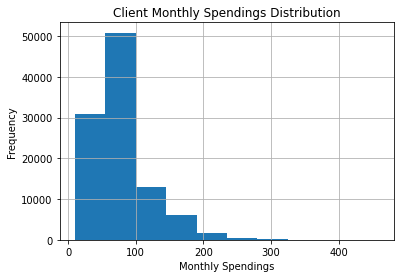

In [19]:
# histogram for montly spendings sum
clnt_monthly_aggregations["mth_txn_amt_sum"].hist()
plt.xlabel("Monthly Spendings")
plt.ylabel("Frequency")
plt.title("Client Monthly Spendings Distribution")

Text(0.5, 1.0, 'Client Montly Spendings Frequency Distribution')

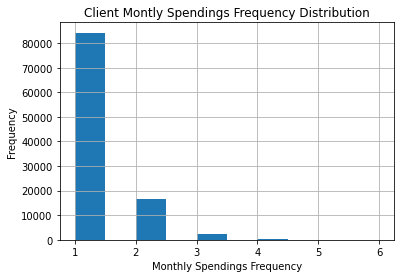

In [20]:
# histogram for montly spendings count
clnt_monthly_aggregations["mth_txn_cnt"].hist()
plt.xlabel("Monthly Spendings Frequency")
plt.ylabel("Frequency")
plt.title("Client Montly Spendings Frequency Distribution")

Observations from the monthly histograms include: most clients shop once a month and most clients spend less than $100 per month.

The distribution shape between part 1.2 and 1.3 are the similar the frequency for both the total amount spends and the number of transaction decreases significantly as its values increases(transaction frequency or spendings). 

Most common transaction frequency for annual data is around 3 and the most common transaction frequency for monthly data is 1. Most common annual spending is around 200 and the most common monthly spending is around 50 to 100. 

Most clients have around 3 transactions a year, with the transactions more spread out throughout the year (rarely shop within the same month). 

Overall monthly spending is around 50 to 100 with most individual shop once per month and annual spending are around 200 with most individuals shop around 3 times per year, which adds up.



In [21]:
# print sliced dataframe
clnt_monthly_aggregations.loc["CS1112"]

,mth_txn_amt_sum,mth_txn_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


## 1.4 Create the base table for the rolling window features

### 1.4.1

In [22]:
# numpy array of unique customer ids
clnt_no = np.array(txn["customer_id"].unique())
# check the number of unique elements
len(clnt_no)

6889

In [23]:
# numpy array of unique month end dates
me_dt = np.array(txn["ME_DT"].unique())
# check the number of unique elements
len(me_dt)

47

### 1.4.2

In [24]:
# import iterate tool
from itertools import product
# create all possible combinations
base_table = product(clnt_no , me_dt)

### 1.4.3

In [25]:
# create base table with all possible combinations
base_table_pd = pd.DataFrame.from_records(base_table, columns = ["CLNT_NO","ME_DT"])

### 1.4.4

In [26]:
# filter client CS1112 rows
CS1112 = base_table_pd[base_table_pd["CLNT_NO"] == "CS1112"]
CS1112

,CLNT_NO,ME_DT
157027,CS1112,2013-02-28
157028,CS1112,2015-03-31
157029,CS1112,2011-11-30
157030,CS1112,2013-11-30
157031,CS1112,2014-03-31
157032,CS1112,2012-02-29
157033,CS1112,2015-01-31
157034,CS1112,2013-01-31
157035,CS1112,2013-08-31
157036,CS1112,2013-07-31


Check that dates fall between the min and max month dates in section 1.1

In [27]:
# check the number of rows for client CS1112 in the basetable
CS1112.shape

(47, 2)

In [28]:
# check the number of rows and columns in the basetable
base_table_pd.shape

(323783, 2)

Number of rows checked, matches.

## 1.5 Create the monthly rolling window features

### 1.5.1

In [29]:
# left join the basetable with the client montly aggregations table
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, how = "left",left_on = ["CLNT_NO", "ME_DT"], right_on = ["customer_id", "ME_DT"])
# print and check
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,NaN,NaN
323780,CS8077,2014-09-30,NaN,NaN
323781,CS8077,2014-02-28,NaN,NaN


Because base table consist of all possible combinations of client to month end date. Most client didn't shop every month for 5 years. Most clients shopped 3 times annually, hence the months that they didn't shop are filled with NaNs.


In [30]:
# fill the missing values with 0
base_clnt_mth = base_clnt_mth.fillna(0)

0 was imputed for the NaN values in the data frame. NaN values exist in the data frame because no transactions were performed, which means the client didn't buy anything in that month.


In [31]:
# get the shape of the dataframe
base_clnt_mth.shape

(323783, 4)

Number of rows should match the number of rows in the basetable, more specificly the number of unique clients * number of unique end month dates (6889*47 = 323783), which matches.

base_clnt_mth is different than clnt_monthly_aggregations because it records a bigger fuller picture of the situation. Row wise clnt_montly_aggregations is a subset of base_clnt_mth, and content wise clnt_montly_aggregations didn't capture the information when the clients didn't shopped. clnt_montly_aggregations has 103234 rows and base_clnt_mth has 323783 rows.

### 1.5.2

In [32]:
# sort the dataframe first by client number,then by end month date
base_clnt_mth = base_clnt_mth.sort_values(["CLNT_NO","ME_DT"])
# print and check
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


### 1.5.3

In [33]:
# create the rolling window dataframes for 3 months, 6 months, and 12 months
rolling_features_3M = base_clnt_mth.groupby("CLNT_NO")[["mth_txn_amt_sum","mth_txn_cnt"]].rolling(3).agg({'mth_txn_amt_sum': ['sum', 'mean', 'max'],'mth_txn_cnt': ['sum','mean','max']})
rolling_features_6M = base_clnt_mth.groupby("CLNT_NO")[["mth_txn_amt_sum","mth_txn_cnt"]].rolling(6).agg({'mth_txn_amt_sum': ['sum', 'mean', 'max'],'mth_txn_cnt': ['sum','mean','max']})
rolling_features_12M = base_clnt_mth.groupby("CLNT_NO")[["mth_txn_amt_sum","mth_txn_cnt"]].rolling(12).agg({'mth_txn_amt_sum': ['sum', 'mean', 'max'],'mth_txn_cnt': ['sum','mean','max']})

In [34]:
rolling_features_3M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0
...                        ...        ...   ...         ...       ...  ...
CS9000  295140             0.0   0.000000   0.0         0.0  0.000000  0.0
        295126             0.0   0.000000   0.0         0.0  0.000000  0.0
        295119             0.0   0.000000   0.0         0.0  0.000000  0.0
        295136            34.0  11.333333  34.0         1.0  0.333333  1.0
        295114            34.0  11.333333  34.0         1.0  0.333333  1.0

[323783 rows x 6 columns]

In [35]:
rolling_features_6M

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
...                        ...        ...   ...         ...       ...  ...
CS9000  295140            61.0  10.166667  35.0         2.0  0.333333  1.0
        295126            61.0  10.166667  35.0         2.0  0.333333  1.0
        295119            35.0   5.833333  35.0         1.0  0.166667  1.0
        295136            34.0   5.666667  34.0         1.0  0.166667  1.0
        295114            34.0   5.666667  34.0         1.0  0.166667  1.0

[323783 rows x 6 columns]

In [36]:
rolling_features_12M

mth_txn_amt_sum                 mth_txn_cnt               
                           sum      mean   max         sum      mean  max
CLNT_NO                                                                  
CS1112  157064             NaN       NaN   NaN         NaN       NaN  NaN
        157058             NaN       NaN   NaN         NaN       NaN  NaN
        157044             NaN       NaN   NaN         NaN       NaN  NaN
        157069             NaN       NaN   NaN         NaN       NaN  NaN
        157060             NaN       NaN   NaN         NaN       NaN  NaN
...                        ...       ...   ...         ...       ...  ...
CS9000  295140            97.0  8.083333  35.0         4.0  0.333333  1.0
        295126            97.0  8.083333  35.0         4.0  0.333333  1.0
        295119            81.0  6.750000  35.0         3.0  0.250000  1.0
        295136           115.0  9.583333  35.0         4.0  0.333333  1.0
        295114           115.0  9.583333  35.0         4.0  0.333333  1.0

[323783 rows x 6 columns]

rolling_features_3M has 2 NaN rows

rolling_features_6M has 5 NaN rows 

rolling_features_12M has 11 NaN rows

Becasue rolling window features are statistical properties based on a window of values, hence rolling window features of size 3 will require 3 data points to calculate the first rollwing window value. Thats why the first two rows of rolling_features_3M are NaN, because there wasn't enough window size to calcualte the value for row 1 and 2.

Both index and columns have 2 levels, yes these are multiindex datatframes.

In [37]:
# rename the columns of the rolling window dataframes
rolling_features_3M.columns = ["amt_sum_3M", "amt_mean_3M", "amt_max_3M", "txn_cnt_sum_3M", "txn_cnt_mean_3M", "txn_cnt_max_3M"]
rolling_features_6M.columns = ["amt_sum_6M", "amt_mean_6M", "amt_max_6M", "txn_cnt_sum_6M", "txn_cnt_mean_6M", "txn_cnt_max_6M"]
rolling_features_12M.columns = ["amt_sum_12M", "amt_mean_12M", "amt_max_12M", "txn_cnt_sum_12M", "txn_cnt_mean_12M", "txn_cnt_max_12M"]

### 1.5.4

In [38]:
# merge the 4 tables together on index
all_rolling_features = base_clnt_mth.merge(rolling_features_3M.droplevel(0), left_index=True, right_index=True).merge(rolling_features_6M.droplevel(0), left_index=True, right_index=True).merge(rolling_features_12M.droplevel(0), left_index=True, right_index=True)
# print and check
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
295136,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


### 1.5.5

In [39]:
# check the shape of the dataframe
all_rolling_features.shape

(323783, 22)

In [40]:
# save the dataframe as xlsx
all_rolling_features.to_excel("mth_rolling_features.xlsx") 

## 1.6 Date-related features: date of the week

### 1.6.1

In [41]:
# create new columns day_of_the_week and day_name by datetime index object
txn["day_of_the_week"] = txn["txn_date"].dt.dayofweek
txn["day_name"] = txn["txn_date"].dt.day_name()
txn.head(4)

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday


### 1.6.2

Text(0.5, 1.0, 'Count of transactions per day of the week')

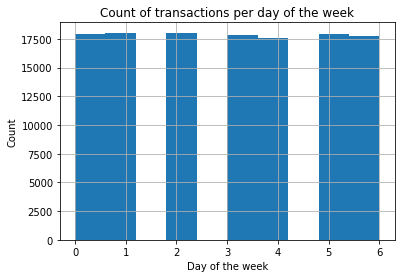

In [42]:
# plot the histogram that shows the count of transactions per day of the week
txn["day_of_the_week"].hist()
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.title("Count of transactions per day of the week")

### 1.6.3

In [43]:
# create temp_txn datafrafme with altered column name cnt to replace tran_amount
temp_txn = txn.rename(columns={"tran_amount": "cnt"})
# create pivot table with three layer column index aggregation, year, and day_name, with fillna = 0
annual_day_of_week_counts_pivot = pd.pivot_table(temp_txn[["customer_id","YEAR","day_name","cnt"]] ,index = "customer_id",
                                                columns = ["YEAR","day_name"],
                                                aggfunc = "count",
                                                fill_value = 0)
annual_day_of_week_counts_pivot

cnt                         ...                                  
YEAR          2011                         ...   2015                           
day_name    Friday Monday Saturday Sunday  ... Sunday Thursday Tuesday Wednesday
customer_id                                ...                                  
CS1112           1      0        0      1  ...      0        0       0         1
CS1113           1      1        0      1  ...      0        0       0         1
CS1114           0      1        0      1  ...      0        1       0         0
CS1115           0      0        1      1  ...      0        1       0         0
CS1116           1      1        0      0  ...      0        0       0         0
...            ...    ...      ...    ...  ...    ...      ...     ...       ...
CS8996           0      1        0      0  ...      0        0       0         0
CS8997           0      0        0      0  ...      0        0       0         0
CS8998           0      0        0      0  ...      0        0       0         0
CS8999           0      1        1      0  ...      0        0       0         0
CS9000           0      0        0      2  ...      0        0       0         0

[6889 rows x 35 columns]

In [44]:
# convert the pivot table to single index 
level_0 = annual_day_of_week_counts_pivot.columns.get_level_values(0). astype(str)
level_1 = annual_day_of_week_counts_pivot.columns.get_level_values(1). astype(str)
level_2 = annual_day_of_week_counts_pivot.columns.get_level_values(2). astype(str)
annual_day_of_week_counts_pivot.columns = level_0 + '_' + level_1+ '_' + level_2

### 1.6.4

In [45]:
# print and check
annual_day_of_week_counts_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,0,0,1,1,0,1,1,0,0,2,1,0,0,1,0,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,1,0,0,0,0,1,0,1,2,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,2,1,1,1,0,1,2,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,0,1,0,0,1,1,1,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,0,1,1,1,2,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0


In [46]:
# save to excel
annual_day_of_week_counts_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")  

annual_day_of_week_counts_pivot has 6889 row and 35 columns. 6889 corresponds to the number of unique clients and 35 corresponds to the combinations of 5 years and 7 days per week.

### 1.6.5

In [47]:
# pivot table for the cnt of transactions per day of week for each customer and end month day combination
mth_day_counts = pd.pivot_table(temp_txn[["customer_id","ME_DT","day_name","cnt"]],index = ["customer_id","ME_DT"],columns = ["day_name"], aggfunc = "count",fill_value = 0)
# flatten the dataframe to 1 layer column index
level_0 = mth_day_counts.columns.get_level_values(0). astype(str)
level_1 = mth_day_counts.columns.get_level_values(1). astype(str)
mth_day_counts.columns = level_0 + '_' + level_1
# print and check
mth_day_counts

cnt_Friday  cnt_Monday  ...  cnt_Tuesday  cnt_Wednesday
customer_id ME_DT                               ...                            
CS1112      2011-06-30           0           0  ...            0              1
            2011-08-31           1           0  ...            0              0
            2011-10-31           0           0  ...            0              0
            2012-04-30           0           0  ...            0              0
            2012-06-30           0           0  ...            0              0
...                            ...         ...  ...          ...            ...
CS9000      2014-01-31           0           0  ...            0              0
            2014-05-31           0           0  ...            0              0
            2014-07-31           0           0  ...            1              0
            2014-08-31           0           0  ...            0              0
            2015-02-28           0           0  ...            0              0

[103234 rows x 7 columns]

### 1.6.6

In [48]:
# join mth_day_counts with base_table_pd 
mth_day_counts = base_table_pd.merge(mth_day_counts, how = "left",left_on = ["CLNT_NO", "ME_DT"], right_on = ["customer_id", "ME_DT"])
# fill nan with 0
mth_day_counts = mth_day_counts.fillna(0)
# print and check
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
323778,CS8077,2011-08-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
323779,CS8077,2012-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# save to excel file
mth_day_counts.to_excel("mth_day_counts.xlsx")  

## 1.7 Date-related features: days since last transaction

### 1.7.1

In [50]:
# create dataframe that captures the last purchase per month for each client
last_monthly_purchase = txn[["customer_id","ME_DT","txn_date"]].groupby(["customer_id","ME_DT"]).agg("max")
last_monthly_purchase

txn_date
customer_id ME_DT                
CS1112      2011-06-30 2011-06-15
            2011-08-31 2011-08-19
            2011-10-31 2011-10-02
            2012-04-30 2012-04-08
            2012-06-30 2012-06-24
...                           ...
CS9000      2014-01-31 2014-01-12
            2014-05-31 2014-05-08
            2014-07-31 2014-07-08
            2014-08-31 2014-08-24
            2015-02-28 2015-02-28

[103234 rows x 1 columns]

### 1.7.2

In [51]:
# join the basetable with the last_monthly_purchase
last_monthly_purchase_base = base_table_pd.merge(last_monthly_purchase, how = "left",left_on = ["CLNT_NO", "ME_DT"], right_on = ["customer_id", "ME_DT"])
# sort the values first by client then by date
last_monthly_purchase_base = last_monthly_purchase_base.sort_values(["CLNT_NO","ME_DT"])
# rename the last column
last_monthly_purchase_base = last_monthly_purchase_base.rename(columns = {"txn_date":"last_monthly_purchase"})
# print dataframe
last_monthly_purchase_base.head(8)

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT


foward fill the missing data.

### 1.7.3

In [52]:
# first group the rows by client and apple forward fill to fill the missing data
last_monthly_purchase_base = last_monthly_purchase_base.groupby("CLNT_NO").apply(lambda x: x.ffill())
# print dataframe
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,2011-06-15
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,2011-08-19
...,...,...,...
295140,CS9000,2014-11-30,2014-08-24
295126,CS9000,2014-12-31,2014-08-24
295119,CS9000,2015-01-31,2014-08-24
295136,CS9000,2015-02-28,2015-02-28


In [53]:
# check with assignment file output
last_monthly_purchase_base[last_monthly_purchase_base["CLNT_NO"]=="CS1114"].head(5)

,CLNT_NO,ME_DT,last_monthly_purchase
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24
101130,CS1114,2011-09-30,2011-09-19


### 1.7.4

In [54]:
# substract the two columns to calculate the days since last transaction
last_monthly_purchase_base["days_since_last_txn"] = (last_monthly_purchase_base["ME_DT"] - last_monthly_purchase_base["last_monthly_purchase"]).dt.days
# print the first five rows
last_monthly_purchase_base.head(5)

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


### 1.7.5

Text(0.5, 1.0, 'Days since last transaction distribution')

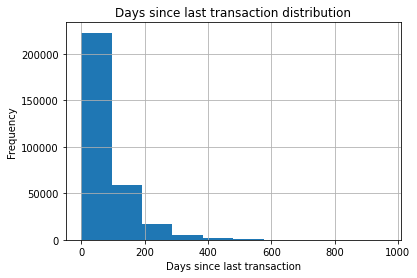

In [55]:
# plot the histogram of the days since last transaction
last_monthly_purchase_base["days_since_last_txn"].hist()
plt.xlabel("Days since last transaction")
plt.ylabel("Frequency")
plt.title("Days since last transaction distribution")

In [56]:
# fill missing values will the median of the days since last transaction
last_monthly_purchase_base["days_since_last_txn"] = last_monthly_purchase_base["days_since_last_txn"].fillna(last_monthly_purchase_base["days_since_last_txn"].median())
# print dataframe
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,51.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


In [57]:
# save three columns as an excel file
last_monthly_purchase_base[["CLNT_NO","ME_DT","days_since_last_txn"]].to_excel("days_since_last_txn.xlsx")  